In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import pickle

2023-03-20 13:39:49.222968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
instruments = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio", "voi"]

path = '../../DataLumenDS/Processed/'


# df = pd.DataFrame(columns=['data', 'label'])



# for instrument in instruments:
#     df = pd.DataFrame(columns=['data', 'label'])
#     for instrumentdir in instruments:
#         tempy = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         tempy[instruments.index(instrumentdir)] = 1
#         for root, _, files in os.walk(path + instrumentdir):
#             for file in files:
#                 file_path = os.path.join(root, file)
#                 data = np.load(file_path)
#                 data = np.array(data)
#                 data = data.reshape((data.shape[0], data.shape[1], 1))
#                 temp = pd.DataFrame({'data': [data], 'label': [tempy.copy()]})
#                 df = pd.concat([df, temp])

In [17]:
df['data'].iloc[0]
df.head()

,data,label
0,"[[[-3.3254266], [-3.3432257], [-3.3528554], [-...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[[[-3.3195252], [-3.3182707], [-3.333399], [-3...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[[[-3.3150115], [-3.3728204], [-3.3746138], [-...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[[[-3.2430305], [-3.3109162], [-3.3086216], [-...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[[[-3.3647768], [-3.3332708], [-3.3320224], [-...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [13]:

df.to_pickle('dataframe.pkl')

In [16]:
with open('dataframe.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
temp_cellist = df[df['label'] == 1]
temp_non_cellist = df[df['label'] == 0]

len(temp_cellist), len(temp_non_cellist)


(0, 0)

In [2]:
X_train = np.load("../X_train.npy")
y_train = np.load("../y_train.npy")
X_test = np.load("../X_test.npy")
y_test = np.load("../y_test.npy")

In [3]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [4]:

X_train, X_test, y_train, y_test = train_test_split(df['data'], df['label'], test_size=0.2, random_state=42)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(temp_non_cellist['data'], temp_non_cellist['label'], test_size=0.2, random_state=42)

print(len(X_train), len(y_train))


# X_train = pd.concat([X_train, X_train2])
# X_test = pd.concat([X_test, X_test2])
# y_train = pd.concat([y_train, y_train2])
# y_test = pd.concat([y_test, y_test2])

# print(len(X_train), len(y_train))

X_train = np.stack(X_train)
X_test = np.stack(X_test)
y_train = np.stack(y_train)
y_test = np.stack(y_test)


10728 10728


In [5]:
X_train.shape

(50292, 128, 44, 1)

In [4]:

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 44, 1)))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))


# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 42, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 19, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 9, 64)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 17280)             0         
                                                                 
 dense (Dense)               (None, 256)               4

2023-03-20 13:40:17.012455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 13:40:17.021701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 13:40:17.022020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 13:40:17.023690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [6]:
model.compile('Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], batch_size=32)

2023-03-20 13:40:45.733044: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1132978176 exceeds 10% of free system memory.
2023-03-20 13:40:47.088892: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1132978176 exceeds 10% of free system memory.


Epoch 1/20


2023-03-20 13:40:49.671652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-20 13:40:52.429874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-20 13:40:52.455584: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1c9d6fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-20 13:40:52.455610: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-03-20 13:40:52.468539: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-20 13:40:52.613441: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the li

1572/1572 [==============================] - 138s 83ms/step - loss: 0.3260 - accuracy: 0.2246 - val_loss: 0.2568 - val_accuracy: 0.3542
Epoch 2/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.2688 - accuracy: 0.3070 - val_loss: 0.2503 - val_accuracy: 0.3715
Epoch 3/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.2539 - accuracy: 0.3574 - val_loss: 0.2350 - val_accuracy: 0.4255
Epoch 4/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.2388 - accuracy: 0.4068 - val_loss: 0.2279 - val_accuracy: 0.4354
Epoch 5/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.2224 - accuracy: 0.4582 - val_loss: 0.2185 - val_accuracy: 0.4757
Epoch 6/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.2050 - accuracy: 0.5083 - val_loss: 0.2171 - val_accuracy: 0.4754
Epoch 7/20
1572/1572 [==============================] - 128s 81ms/step - loss: 0.1874 - accuracy: 0.5592 - val_loss: 0.2216 - val

84/84 - 15s - loss: 0.1844 - accuracy: 0.5925 - 15s/epoch - 177ms/step


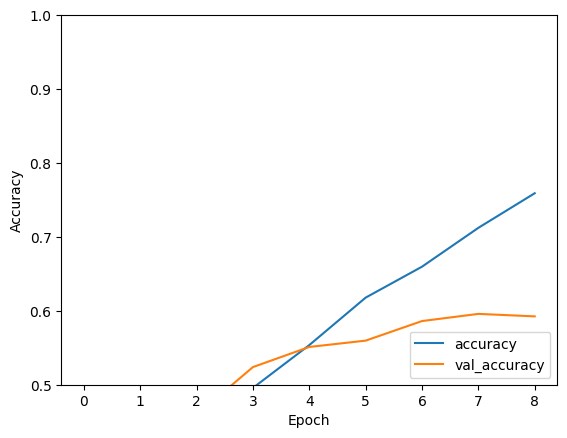

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("modelBIG.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelBIG.h5")
print("Saved model to disk")
 


Saved model to disk


In [ ]:

# load json and create model
json_file = open('modelivara.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelivara.h5")
print("Loaded model from disk")

Loaded model from disk
